# Project:NoShowAppointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


# The NoshowAppointment Data Set will be used to answer the following questions:-

### Question(1): Are appointments being missed by those who recieved the Sms?

### Question(2): Those with What illment made their appointment more than the others?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling 
> 
### General Properties

In [102]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.shape

(110527, 14)

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info

<bound method DataFrame.info of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


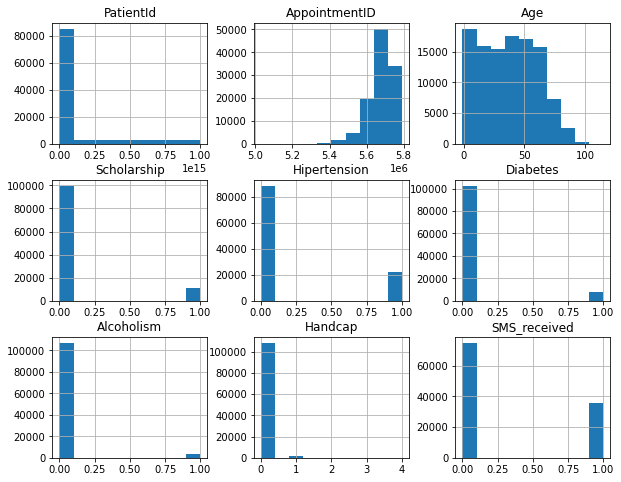

In [7]:
# Ploting a histogram graph to see graphically the value representation of each column
df.hist(figsize=(10,8));

In [8]:
# Checking for Null values in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
# to be able to read data in the Gender column for the its unique values, making the querying easier
male = df.Gender == 'M'
female = df.Gender == 'F'

Text(0.5, 1.0, 'Number of Male and Female Patients')

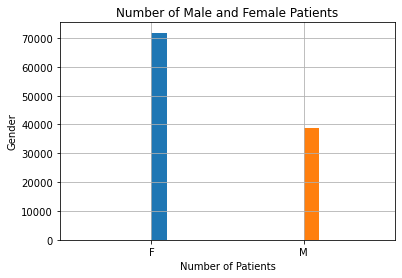

In [11]:
df.Gender[female].hist()
df.Gender[male].hist()
plt.xlabel('Number of Patients')
plt.ylabel('Gender')
plt.title('Number of Male and Female Patients')

###### The above graph shows us the number of male and female patients present in the database

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Text(0.5, 1.0, "Age Range of Patients who Made their appointment VS Those who didn't")

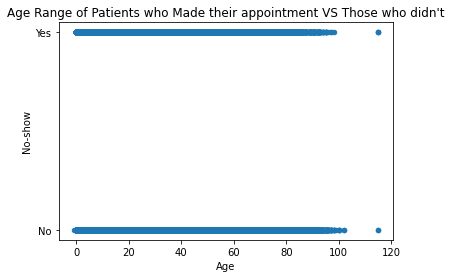

In [13]:
df.plot(x="Age", y="No-show", kind="scatter");
plt.title("Age Range of Patients who Made their appointment VS Those who didn't")

###### Age Range of Patients who Made their appointment VS Those who didn'tv

### Data Cleaning 

In [ ]:
# Data was presented clean, with no Null values
# So cleaning was not required


<a id='eda'></a>
## Exploratory Data Analysis

# Q1. Are appointments being missed by those who recieved the Sms?

In [55]:
sms_received = df.SMS_received == 1
sms_notreceived = df.SMS_received == 0

In [15]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [34]:
df.groupby('No-show')['SMS_received'].value_counts()

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

In [47]:
def B_chart(arg):
    df.groupby(['No-show', arg]).AppointmentID.count().plot(kind = 'bar')

Text(0.5, 1.0, 'Patients who received SMS')

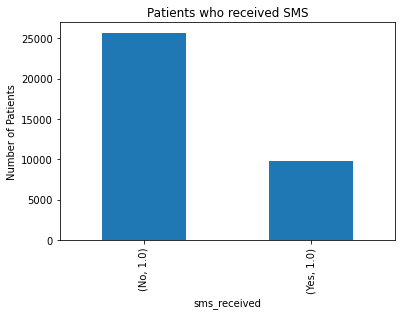

In [58]:
B_chart(df.SMS_received[sms_received])
plt.xlabel('sms_received')
plt.ylabel('Number of Patients')
plt.title("Patients who received SMS")

###### This Shows the Number of patients who received sms for schedule. Not all of them showed up for their appointment. 

Text(0.5, 1.0, "Patients who didn't receive SMS")

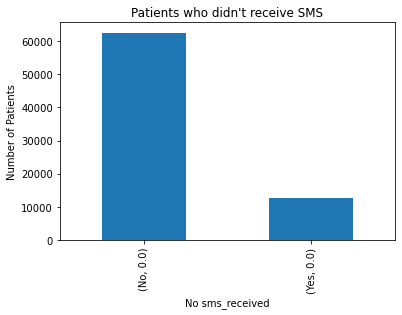

In [57]:
B_chart(df.SMS_received[sms_notreceived])
plt.xlabel('No sms_received')
plt.ylabel('Number of Patients')
plt.title("Patients who didn't receive SMS")

###### This shows the patients who didn't recieve any sms. Showing that a very high percentage of them missed their appointment.

# Q2. Those with What illment made their appointment more than the others?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [67]:
Hiper = df.Hipertension == 1
df.groupby('No-show')['Hipertension'].value_counts()

No-show  Hipertension
No       0               70179
         1               18029
Yes      0               18547
         1                3772
Name: Hipertension, dtype: int64

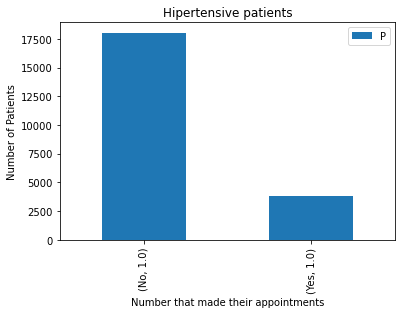

In [71]:
B_chart(df.Hipertension[Hiper])
plt.xlabel('Number that made their appointments')
plt.ylabel('Number of Patients')
plt.title("Hipertensive patients")
plt.legend('H_Patients')

###### The above graph shows that a very high number(18,029) of Hipertensive patients didn't make their appointment

In [72]:
diabetes = df.Diabetes == 1
df.groupby('No-show')['Diabetes'].value_counts()

No-show  Diabetes
No       0           81695
         1            6513
Yes      0           20889
         1            1430
Name: Diabetes, dtype: int64

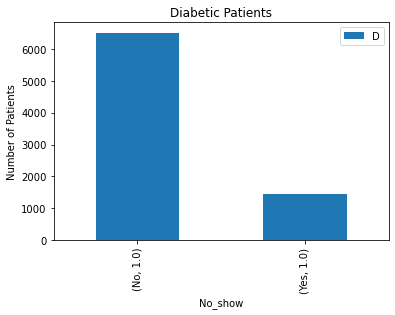

In [73]:
B_chart(df.Diabetes[diabetes])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Diabetic Patients")
plt.legend('D_patients')

###### The above graph shows that 6,513 diabetic patients missed their appointment

In [101]:
alcoholic = df.Alcoholism == 1
df.groupby('No-show')['Alcoholism'].value_counts()

No-show  Alcoholism
No       1             88208
Yes      1             22319
Name: Alcoholism, dtype: int64

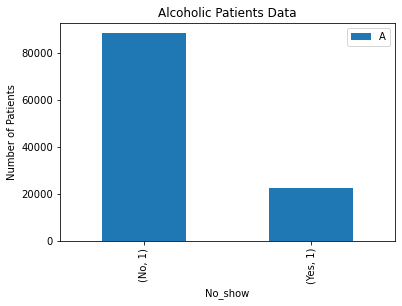

In [79]:
B_chart(df.Alcoholism[alcoholic])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Alcoholic Patients Data")
plt.legend('A_patients')

###### The above graph shows that 2,683 Alcoholic patients missed their appointment

In [82]:
hc1 = df.Handcap == 1
hc2 = df.Handcap == 2
hc3 = df.Handcap == 3
hc4 = df.Handcap == 4
df.groupby('No-show')['Handcap'].value_counts()

No-show  Handcap
No       0          86374
         1           1676
         2            146
         3             10
         4              2
Yes      0          21912
         1            366
         2             37
         3              3
         4              1
Name: Handcap, dtype: int64

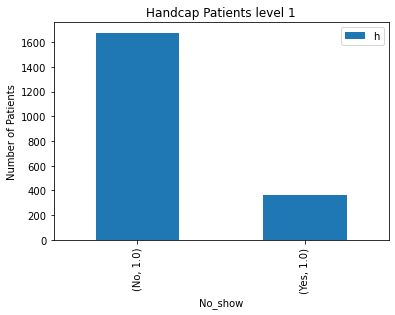

In [89]:
B_chart(df.Handcap[hc1])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Handcap Patients level 1")
plt.legend('hc1')

###### This shows 1,676 patients from the level 1 handcap didn't make their appointment

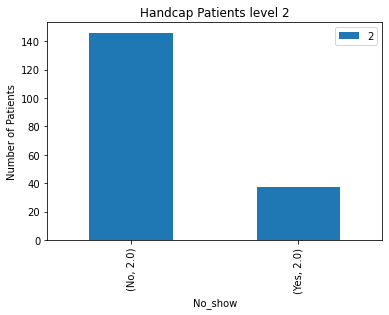

In [92]:
B_chart(df.Handcap[hc2])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Handcap Patients level 2")
plt.legend('2hc')

###### This shows 146 patients from the level 2 handcap didn't make their appointment.

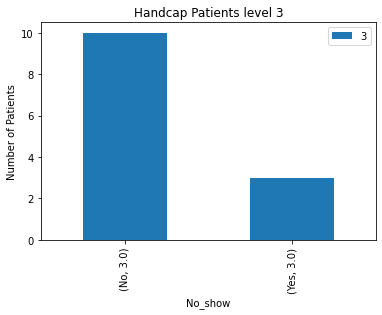

In [91]:
B_chart(df.Handcap[hc3])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Handcap Patients level 3")
plt.legend('3hc')

###### This shows 10 patients from the level 2 handcap didn't make their appointment.

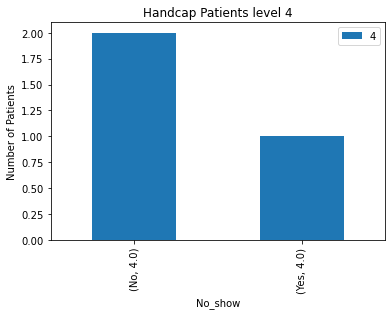

In [90]:
B_chart(df.Handcap[hc4])
plt.xlabel('No_show')
plt.ylabel('Number of Patients')
plt.title("Handcap Patients level 4")
plt.legend('4hc')

###### This shows 2 patients from the level 2 handcap didn't make their appointment.

<a id='conclusions'></a>
## Conclusions


Q1. Are appointments being missed by those who recieved the Sms?
Yes, appointment where bieng missed by those who got the Sms, but a larger number of those who didn't get the sms didn't make it. Not getting the appointment sms caused 62,510 patients to miss their appointment.

Q2. Those with What illment made their appointment more than the others?
 Hipertensive and Diabetic patients had the highest tendency of not showing up for appointments. While Alcoholic and Handcap patients have more likelyhood of not missing their appointment. 
 
Solution: Ensure that the Sms is sent to all patients for better reminder. And emphasis should be placed on the Hipertensive and Diabetic patients.

# Limitations

1) Due to the fact that Sms wasn't sent to all patients, makes it difficult to finalise based on the Sms sent.

2) Patients information on why they missed their appointment is required to make a more defined conclution.